### Importación de datos



In [70]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.tail()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
2354,Iphone 15,Electrónicos,1284400.0,66600.0,15/11/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
2355,Impresora,Electrónicos,282800.0,15300.0,18/03/2023,Lucas Olivera,Bogotá,5,Nequi,1,4.60971,-74.08175
2356,Juego de mesa,Juguetes,122900.0,7200.0,06/07/2021,Lucas Olivera,Cali,5,Tarjeta de crédito,4,3.43722,-76.52250
2357,Cama box,Muebles,691300.0,35000.0,02/05/2022,Pedro Gomez,Pasto,1,Tarjeta de crédito,2,1.21361,-77.28111
2358,Smartwatch,Electrónicos,195000.0,8600.0,18/06/2022,Felipe Santos,Cali,4,Tarjeta de crédito,1,3.43722,-76.52250


#1. Análisis de facturación



In [53]:
tiendas = [tienda, tienda2, tienda3, tienda4]
nombreTiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
ingresoTotal = []
for td in tiendas:
  ingresoTotal.append(td["Precio"].sum())

#print(ingresoTotal) impresa en crudo
# ------- queda con basura esta tabla -------
# dfResultado = pd.DataFrame(
#    zip(tiendas, ingresoTotal),
#    columns=["Tienda", "Ingreso"]
# )

# dfResultado

#--- limpia ----
df_resultado = pd.DataFrame({
    "Tienda": nombreTiendas,
    "Ingreso": ingresoTotal
})

df_resultado

,Tienda,Ingreso
0,Tienda 1,1.150880e+09
1,Tienda 2,1.116344e+09
2,Tienda 3,1.098020e+09
3,Tienda 4,1.038376e+09


# 2. Ventas por categoría

In [21]:
vCategorias = []

for i, td in enumerate(tiendas, 1):
  conteo = td.groupby("Categoría del Producto").size()
  vCategorias.append([
      f"Tienda {i}",
      conteo.idxmax(),
      conteo.max()
  ])

ventasDF = pd.DataFrame(vCategorias, columns=["Tienda", "Categoría", "Cantidad"])
ventasDF

,Tienda,Categoría,Cantidad
0,Tienda 1,Muebles,465
1,Tienda 2,Muebles,442
2,Tienda 3,Muebles,499
3,Tienda 4,Muebles,480


# 3. Calificación promedio de la tienda


In [23]:
calificaciones = []
for i, td in enumerate(tiendas, 1):
    promedio = td["Calificación"].mean().round(2)
    calificaciones.append([f"Tienda {i}", promedio])

dfCalificaciones = pd.DataFrame(
    calificaciones,
    columns=["Tienda", "Calificación promedio"]
)

dfCalificaciones

,Tienda,Calificación promedio
0,Tienda 1,3.98
1,Tienda 2,4.04
2,Tienda 3,4.05
3,Tienda 4,4.00


# 4. Productos más y menos vendidos

In [26]:
vMax = []

for i, td in enumerate(tiendas, 1):
  conteo = td.groupby("Producto").size()
  vMax.append([
      f"Tienda {i}",
      conteo.idxmax(),
      conteo.max()
  ])

ventasMaxDF = pd.DataFrame(vMax, columns=["Tienda", "Producto", "Cantidad"])
ventasMaxDF

,Tienda,Producto,Cantidad
0,Tienda 1,Armario,60
1,Tienda 2,Iniciando en programación,65
2,Tienda 3,Kit de bancas,57
3,Tienda 4,Cama box,62


In [27]:
vMin = []

for i, td in enumerate(tiendas, 1):
  conteo = td.groupby("Producto").size()
  vMin.append([
      f"Tienda {i}",
      conteo.idxmin(),
      conteo.min()
  ])

ventasMinDF = pd.DataFrame(vMin, columns=["Tienda", "Producto", "Cantidad"])
ventasMinDF

,Tienda,Producto,Cantidad
0,Tienda 1,Auriculares con micrófono,33
1,Tienda 2,Juego de mesa,32
2,Tienda 3,Bloques de construcción,35
3,Tienda 4,Guitarra eléctrica,33


# 5. Envío promedio por tienda

In [28]:
envioPromedio = []
for i, td in enumerate(tiendas, 1):
    promedio = td["Costo de envío"].mean().round(2)
    envioPromedio.append([f"Tienda {i}", promedio])

dfenvioPromedio = pd.DataFrame(
    envioPromedio,
    columns=["Tienda", "Costo de envío"]
)

dfenvioPromedio

,Tienda,Costo de envío
0,Tienda 1,26018.61
1,Tienda 2,25216.24
2,Tienda 3,24805.68
3,Tienda 4,23459.46


# 6. Graficos

In [29]:
import matplotlib.pyplot as plt

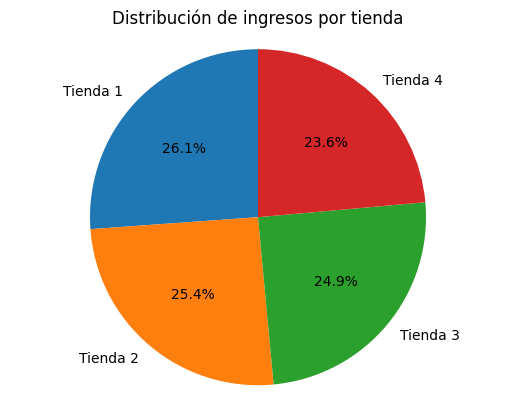

In [78]:
ingresoMillones = [x / 1_000_000 for x in ingresoTotal]
nombreTiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

plt.figure()
plt.pie(
    ingresoMillones,
    labels=nombreTiendas,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Distribución de ingresos por tienda")
plt.axis('equal')
plt.show()

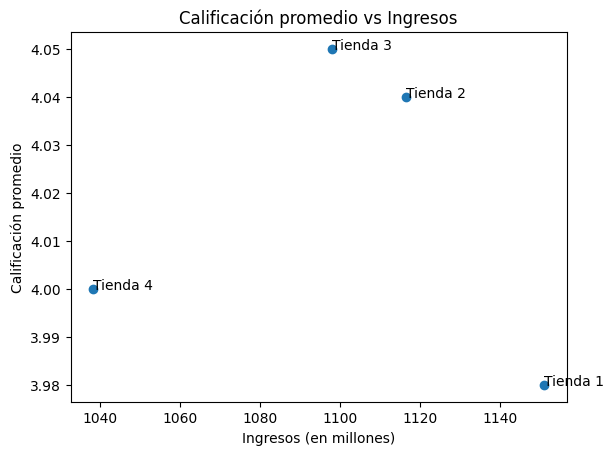

In [56]:
plt.figure()
plt.scatter(ingresoMillones, dfCalificaciones['Calificación promedio'])
plt.title("Calificación promedio vs Ingresos")
plt.xlabel("Ingresos (en millones)")
plt.ylabel("Calificación promedio")

for i, nombre in enumerate(dfCalificaciones["Tienda"]):
    plt.text(ingresoMillones[i], y.iloc[i], nombre)

plt.show()

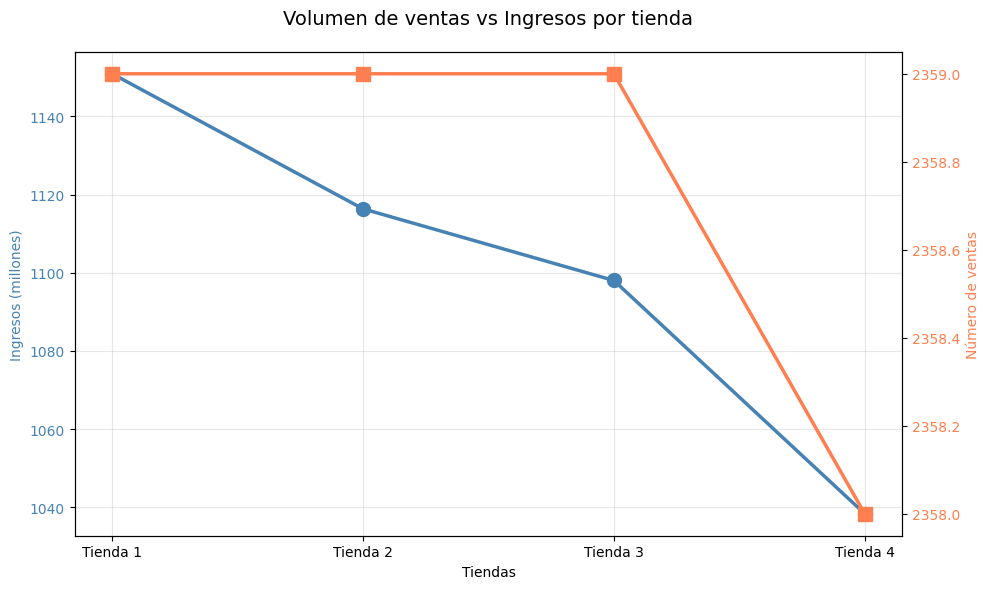

In [92]:
ventas = [len(td) for td in tiendas]

fig, ax1 = plt.subplots(figsize=(10, 6))

# Eje izquierdo - Ingresos
color = 'steelblue'
ax1.set_xlabel('Tiendas')
ax1.set_ylabel('Ingresos (millones)', color=color)
ax1.plot(nombreTiendas, ingresoMillones, color=color, marker='o', linewidth=2.5, markersize=10, label='Ingresos')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)

# Eje derecho - Volumen de ventas
ax2 = ax1.twinx()
color = 'coral'
ax2.set_ylabel('Número de ventas', color=color)
ax2.plot(nombreTiendas, ventas, color=color, marker='s', linewidth=2.5, markersize=10, label='Ventas')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Volumen de ventas vs Ingresos por tienda', fontsize=14, pad=20)
fig.tight_layout()
plt.show()

# 7. Conclusion

Segun los graficos y las tablas las tiendas tienen un rendimiento muy parecido entre ellas pero la tienda que destacar por peor rendimiento es la tienda 4 la cual tiene un menor ingreso total y menor cantidad de ventas, agregando a que se encuentra por debajo de la media en la satisfaccion del cliente.

Es por esto que se señala a la tienda 4 como la mejor tienda para vender